<a href="https://colab.research.google.com/github/sonjoy1s/ML/blob/main/Final_AI_ML_Assignment_3_Module_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📘 AI/ML Assignment 3
## Supervised Learning Models in Practice

**Total Marks: 100**  
**Submission Format:** Single Jupyter Notebook (`.ipynb`)

---
## 📌 General Instructions (Read Carefully)

- This assignment covers **Modules 13–18**.
- Use **Python and scikit-learn only**.
- Do NOT use AutoML, deep learning, or external ML libraries.
- Fix `random_state=42` wherever applicable.
- Plots must be labeled and readable.
- Do not delete or rename cells.

***Classification Dataset:*** https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data/data

***Regresssion Dataset:*** https://www.kaggle.com/datasets/mirichoi0218/insurance

## 🔧 TODO 0: Environment Setup (5 Marks)
**Marks Breakdown:**
- Correct imports (3)
- Clean setup, no unused imports (2)


In [250]:
# TODO: Import all necessary libraries here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,accuracy_score,precision_score,recall_score,confusion_matrix,f1_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,RobustScaler,PolynomialFeatures
from sklearn.metrics import classification_report
#from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC,SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor

# 🔵 PART A: Regression Task (45 Marks)
You will work with the provided **regression dataset**.


## TODO A1: Dataset Loading and Understanding (5 Marks)
**You must:**
- Load the dataset
- Show shape and column names
- Identify target variable

**Marks:** Data loading (2), Explanation (3)


In [251]:
# TODO: Load regression dataset
rg_df = pd.read_csv("/content/insurance.csv")
rg_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [252]:
print(rg_df.shape)

(1338, 7)


In [253]:
rg_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [254]:
rg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [255]:
rg_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [256]:
rg_df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [257]:
target = "charges"

## TODO A2: Exploratory Data Analysis (EDA) (5 Marks)
**You must:**
- Show descriptive statistics
- Plot correlation heatmap
- Plot at least one feature vs target

**Marks:** Plots (3), Interpretation (2)


In [258]:
# TODO: Perform EDA
numerical_col = ['age','bmi','children']
categorical_col = ['sex','smoker','region']
rg_df[numerical_col].agg(['min','max','mean','median']).T

,min,max,mean,median
age,18.00,64.00,39.207025,39.0
bmi,15.96,53.13,30.663397,30.4
children,0.00,5.00,1.094918,1.0


sex ['female' 'male']
smoker ['yes' 'no']
region ['southwest' 'southeast' 'northwest' 'northeast']


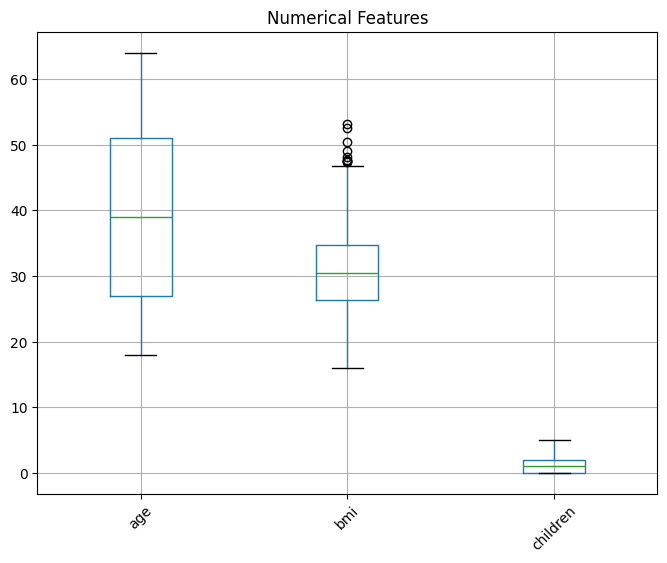

In [259]:
for c in categorical_col:
  print(c,rg_df[c].unique())

plt.figure(figsize=(8,6))
rg_df[numerical_col].boxplot()
plt.title("Numerical Features")
plt.xticks(rotation=45)
plt.show()

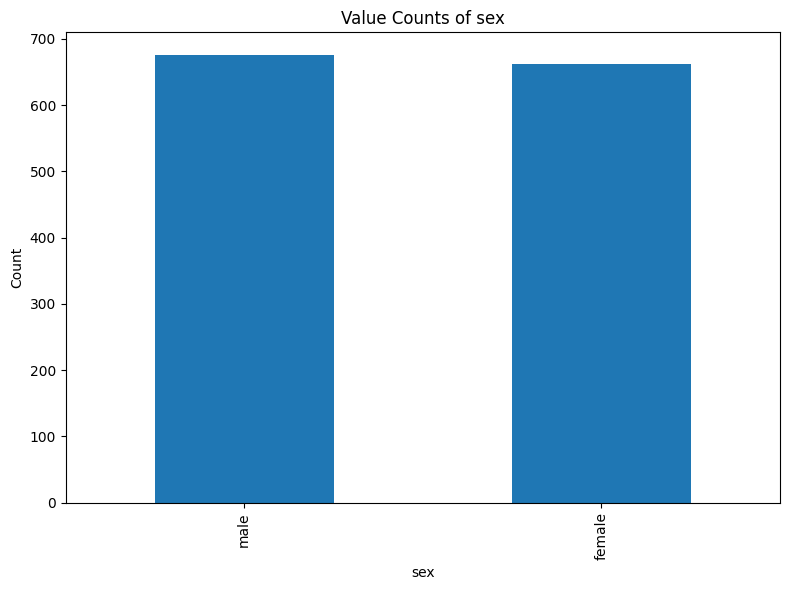

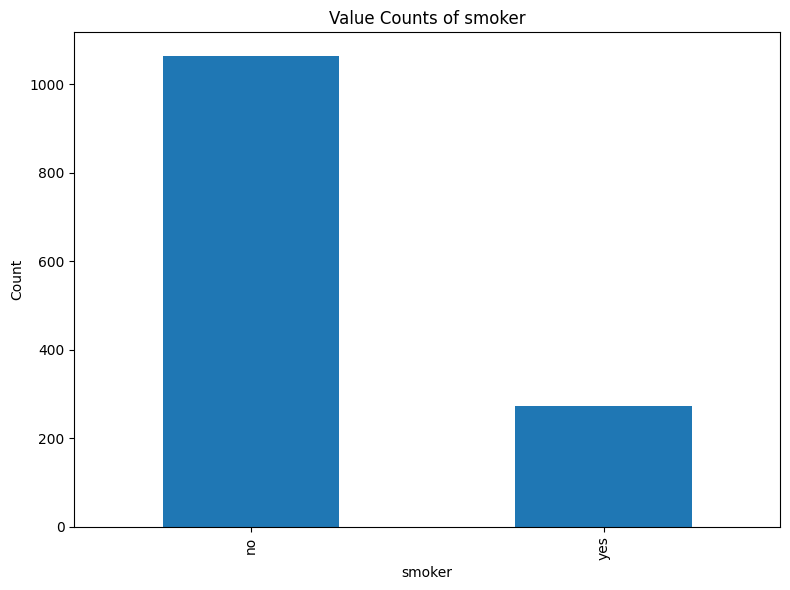

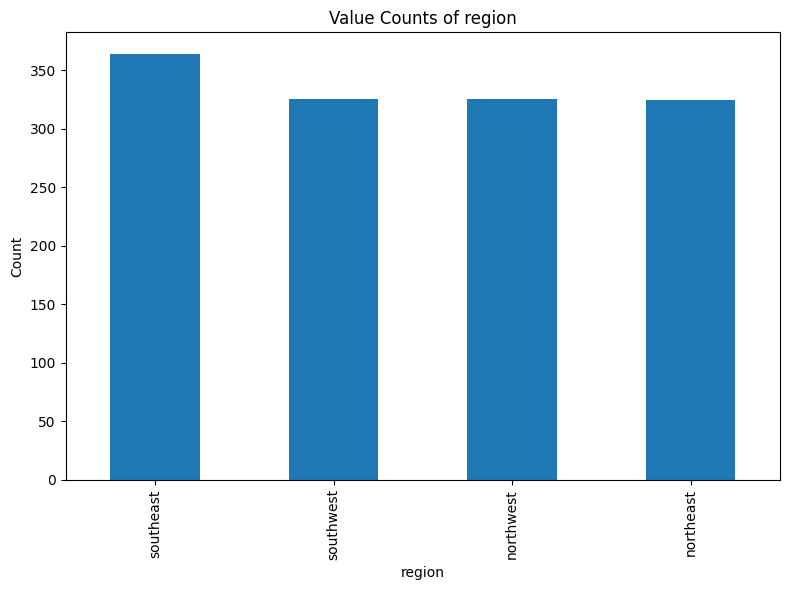

In [260]:
for c in categorical_col:
  plt.figure(figsize=(8,6))
  rg_df[c].value_counts().plot(kind='bar')
  plt.title(f"Value Counts of {c}")
  plt.ylabel("Count")
  plt.tight_layout()
  plt.show()

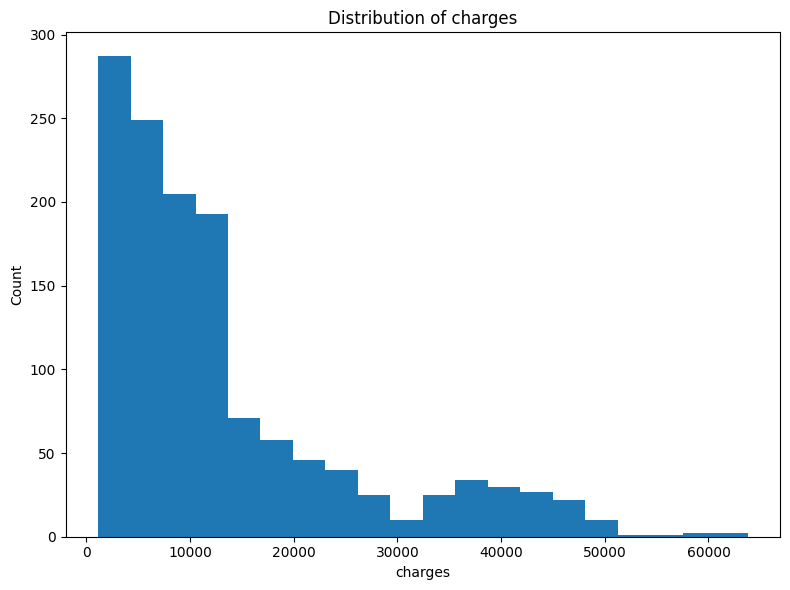

In [261]:
#targer distribution and class imblance
plt.figure(figsize=(8,6))
rg_df[target].plot(kind='hist',bins=20)
plt.title(f"Distribution of {target}")
plt.xlabel(target)
plt.ylabel("Count")
plt.tight_layout()
plt.show()

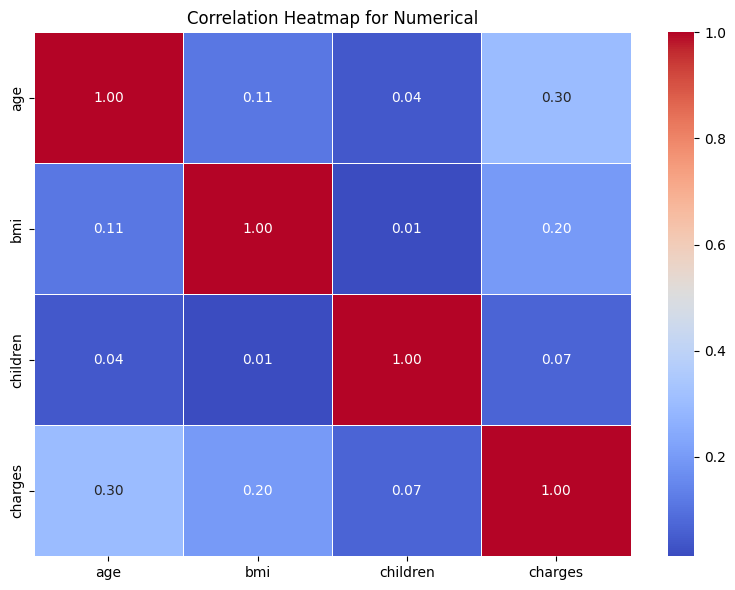

In [262]:
corr_matrix = rg_df[numerical_col + [target]].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5)
plt.title("Correlation Heatmap for Numerical")
plt.tight_layout()
plt.show()

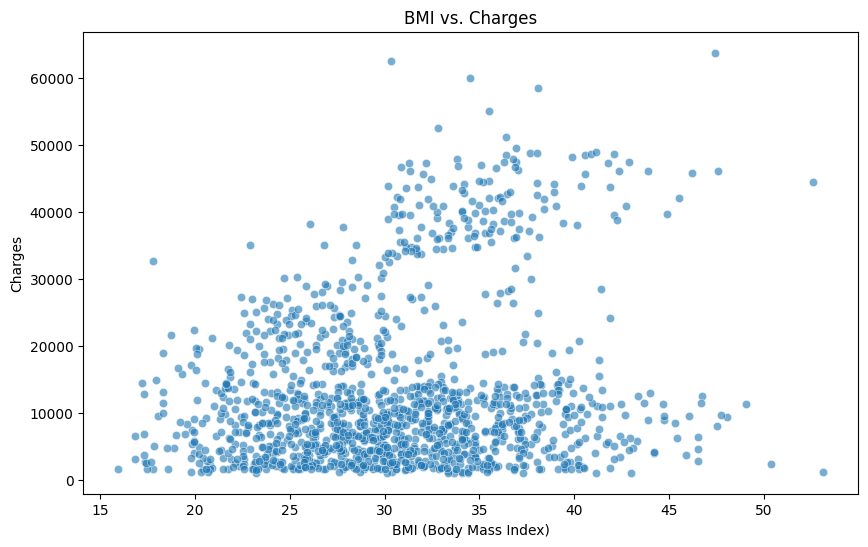

In [263]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rg_df, x='bmi', y=target, alpha=0.6)
plt.title('BMI vs. Charges')
plt.xlabel('BMI (Body Mass Index)')
plt.ylabel('Charges')
plt.show()

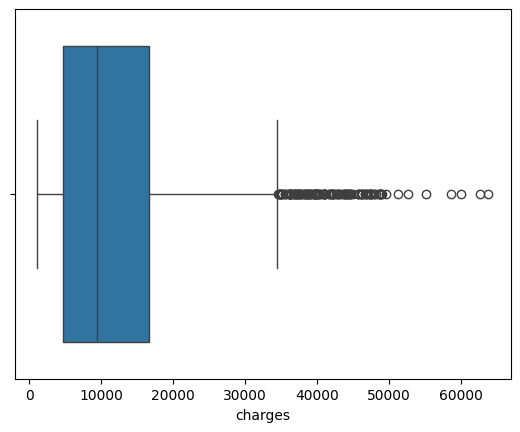

In [264]:
sns.boxplot(x=rg_df[target])
plt.show()

In [265]:
Q1 = rg_df[target].quantile(0.25)
Q3 = rg_df[target].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
low = Q1 - 1.5 * IQR
high = Q3 + 1.5 * IQR
print(low,high)
outliers = rg_df[(rg_df[target] < low) | (rg_df[target] > high)]
print(len(outliers))

11899.625365
-13109.1508975 34489.350562499996
139


In [266]:

le = LabelEncoder()
rg_df['sex'] = le.fit_transform(rg_df['sex'])
rg_df['smoker'] = le.fit_transform(rg_df['smoker'])
rg_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [267]:
on = OneHotEncoder()
rg_df= pd.get_dummies(rg_df,columns=['region'],dtype=int)
rg_df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [268]:
df_log = rg_df.copy()
df_log[target + '_log'] = np.log1p(df_log[target])
df_log.head()
df_log.drop(target,axis=1,inplace=True)
df_log.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest,charges_log
0,19,0,27.900,0,1,0,0,0,1,9.734236
1,18,1,33.770,1,0,0,0,1,0,7.453882
2,28,1,33.000,3,0,0,0,1,0,8.400763
3,33,1,22.705,0,0,0,1,0,0,9.998137
4,32,1,28.880,0,0,0,1,0,0,8.260455


## TODO A3: Feature Preparation (5 Marks)
**You must:**
- Train-test split
- Scaling (if applicable)

**Marks:** Correct split (3), Explanation (2)


In [269]:
# TODO: Prepare features
X = df_log.drop('charges_log', axis=1)
y = df_log['charges_log']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
#scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(f"X_train shape: {X_train_scaled.shape}")
print(f"X_test shape: {X_test_scaled.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1070, 9)
X_test shape: (268, 9)
y_train shape: (1070,)
y_test shape: (268,)


## TODO A4: Multiple Linear Regression (8 Marks)
**You must:**
- Train model
- Evaluate using RMSE, MAE, R²

**Marks:** Model (4), Metrics (4)


In [270]:
# TODO: Multiple Linear Regression
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [271]:
Rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test_scaled)))
print("Root Mean Squared Error =", Rmse)
mea = mean_absolute_error(y_test, model.predict(X_test_scaled))
print("Mean Absolute Error =", mea)
r2 = r2_score(y_test, model.predict(X_test_scaled))
print("R2 =", r2)

Root Mean Squared Error = 0.41893807245607023
Mean Absolute Error = 0.26965057295320444
R2 = 0.804741079139302


## TODO A5: Polynomial Regression (7 Marks)
**You must:**
- Apply polynomial features
- Compare with linear regression

**Marks:** Implementation (4), Comparison (3)


In [272]:
# TODO: Polynomial Regression
poly = PolynomialFeatures(degree=2,include_bias=False) # bias true used korle same ans ase
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print(f"X_train_poly shape: {X_train_poly.shape}")
print(f"X_test_poly shape: {X_test_poly.shape}")

X_train_poly shape: (1070, 54)
X_test_poly shape: (268, 54)


In [273]:
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train_poly, y_train)

LinearRegression()

In [274]:
y_pred_poly_reg = poly_reg_model.predict(X_test_poly)

In [275]:
y_pred_poly_reg = poly_reg_model.predict(X_test_poly)

rmse_poly_reg = np.sqrt(mean_squared_error(y_test, y_pred_poly_reg))
print("Root Mean Squared Error =", rmse_poly_reg)
mae_poly_reg = mean_absolute_error(y_test, y_pred_poly_reg)
print("Mean Absolute Error =", mae_poly_reg)
r2_poly_reg = r2_score(y_test, y_pred_poly_reg)
print("R2 =", r2_poly_reg)

if r2_poly_reg > r2:
  print("Polynomial Regression is better")
else:
  print("Linear Regression is better")

Root Mean Squared Error = 0.3490018835157565
Mean Absolute Error = 0.19648637833067922
R2 = 0.8644914288367671
Polynomial Regression is better


## TODO A6: Support Vector Regression (7 Marks)
**You must:**
- Train SVR (RBF kernel)
- Evaluate performance
- Justify kernel choice

**Marks:** Model (4), Justification (3)


In [276]:
# TODO: Support Vector Regression
from sklearn.svm import SVR
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train)
y_pred_svr = svr_model.predict(X_test_scaled)
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
print("Root Mean Squared Error =", rmse_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
print("Mean Absolute Error =", mae_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print("R2 =", r2_svr)

Root Mean Squared Error = 0.35730551401187505
Mean Absolute Error = 0.15608495219577503
R2 = 0.8579665418416289


# Kernel Justify : 1.non-linear relationships.
# 2.flexibly adjusted using gamma.
# 3.good performance (RMSE = 0.36, R² = 0.86).
# 4.No prior knowledge of non-linear structure is needed.

## TODO A7: Random Forest Regressor (8 Marks)
**You must:**
- Train Random Forest
- Evaluate model

**Marks:** Model (4), Evaluation (4)


In [277]:
# TODO: Random Forest Regressor
rn_model = RandomForestRegressor(n_estimators=1000,max_depth=3, random_state=42)
rn_model.fit(X_train_scaled, y_train)
y_pred_rn = rn_model.predict(X_test_scaled)
rmse_rn = np.sqrt(mean_squared_error(y_test, y_pred_rn))
print("Root Mean Squared Error =", rmse_rn)
mae_rn = mean_absolute_error(y_test, y_pred_rn)
print("Mean Absolute Error =", mae_rn)
r2_rn = r2_score(y_test, y_pred_rn)
print("R2 =", r2_rn)

Root Mean Squared Error = 0.3769427533051206
Mean Absolute Error = 0.22341805263782963
R2 = 0.8419254255576792


# 🟠 PART B: Classification Task (45 Marks)
You will work with the provided **classification dataset**.


## TODO B1: Dataset Understanding (5 Marks)
**You must:**
- Load dataset
- Show class distribution
- Comment on imbalance

**Marks:** Analysis (3), Explanation (2)


In [278]:
# TODO: Load classification dataset
df = pd.read_csv("/content/loan_data.csv")
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [280]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,45000.0,27.764178,6.045108,20.00,24.00,26.00,30.00,144.00
person_income,45000.0,80319.053222,80422.498632,8000.00,47204.00,67048.00,95789.25,7200766.00
person_emp_exp,45000.0,5.410333,6.063532,0.00,1.00,4.00,8.00,125.00
loan_amnt,45000.0,9583.157556,6314.886691,500.00,5000.00,8000.00,12237.25,35000.00
loan_int_rate,45000.0,11.006606,2.978808,5.42,8.59,11.01,12.99,20.00
loan_percent_income,45000.0,0.139725,0.087212,0.00,0.07,0.12,0.19,0.66
cb_person_cred_hist_length,45000.0,5.867489,3.879702,2.00,3.00,4.00,8.00,30.00
credit_score,45000.0,632.608756,50.435865,390.00,601.00,640.00,670.00,850.00
loan_status,45000.0,0.222222,0.415744,0.00,0.00,0.00,0.00,1.00


In [281]:
df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [282]:
df.isna().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [283]:
df.nunique()

,0
person_age,60
person_gender,2
person_education,5
person_income,33989
person_emp_exp,63
person_home_ownership,4
loan_amnt,4483
loan_intent,6
loan_int_rate,1302
loan_percent_income,64


In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [285]:
numerical_cols =['person_age','person_income','person_emp_exp',
                 'loan_amnt','loan_int_rate','loan_percent_income',
                 'cb_person_cred_hist_length','credit_score',]

categorical_cols =['person_gender','person_education','person_home_ownership',
                   'loan_intent','previous_loan_defaults_on_file']


target_col = "loan_status"

In [286]:
df[numerical_cols].agg(['min','max','mean','median']).T

,min,max,mean,median
person_age,20.00,144.00,27.764178,26.00
person_income,8000.00,7200766.00,80319.053222,67048.00
person_emp_exp,0.00,125.00,5.410333,4.00
loan_amnt,500.00,35000.00,9583.157556,8000.00
loan_int_rate,5.42,20.00,11.006606,11.01
loan_percent_income,0.00,0.66,0.139725,0.12
cb_person_cred_hist_length,2.00,30.00,5.867489,4.00
credit_score,390.00,850.00,632.608756,640.00


## TODO B2: Exploratory Data Analysis (5 Marks)
**You must:**
- Plot class counts
- Plot at least one feature vs class

**Marks:** Plots (5),


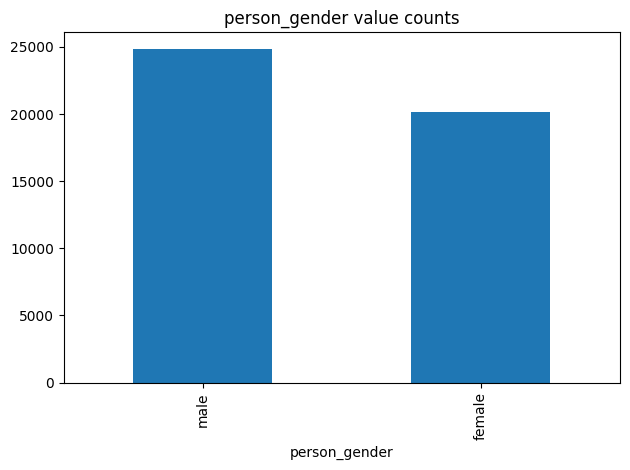

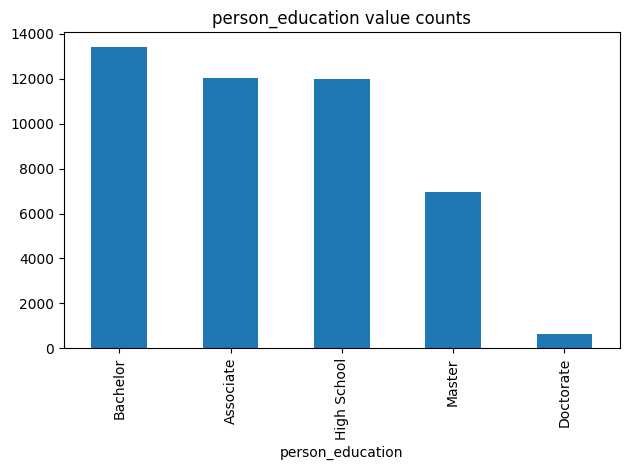

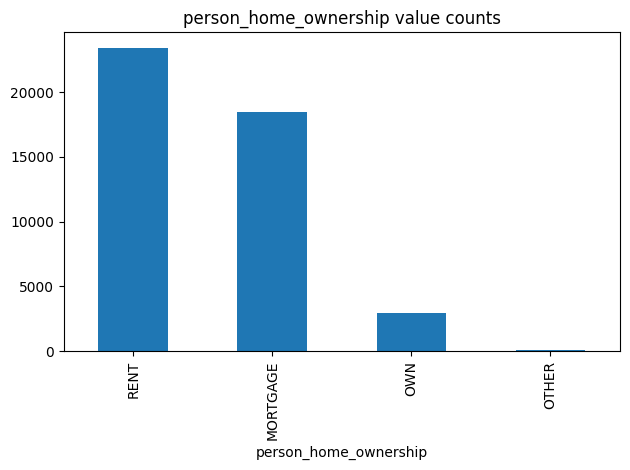

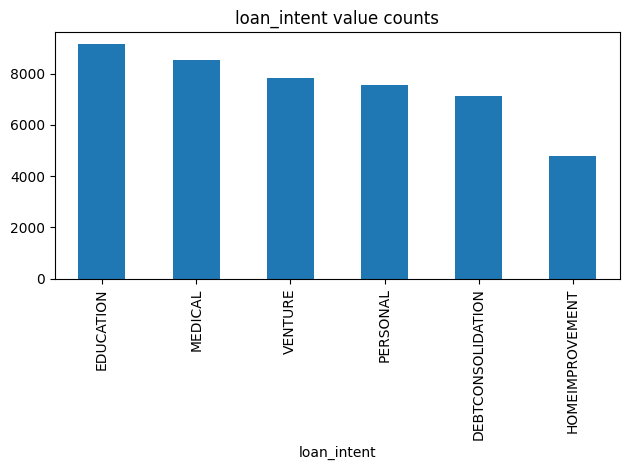

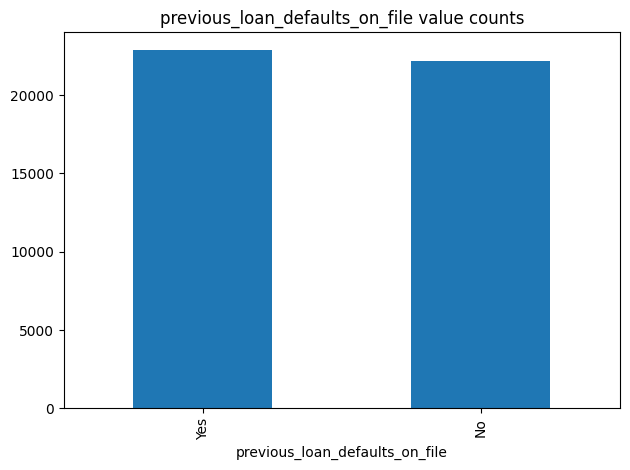

In [287]:
# TODO: Classification EDA
for c in categorical_cols:
  df[c].value_counts().plot(kind='bar')
  plt.title(f'{c} value counts')
  plt.tight_layout()
  plt.show()

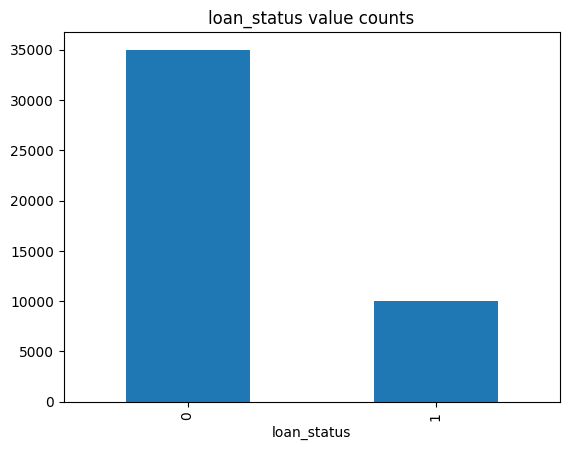

In [288]:
df[target_col].value_counts().plot(kind='bar')
plt.title(f'{target_col} value counts')
plt.show()

In [289]:
df[target_col].value_counts(normalize=True)

,proportion
loan_status,
0,0.777778
1,0.222222


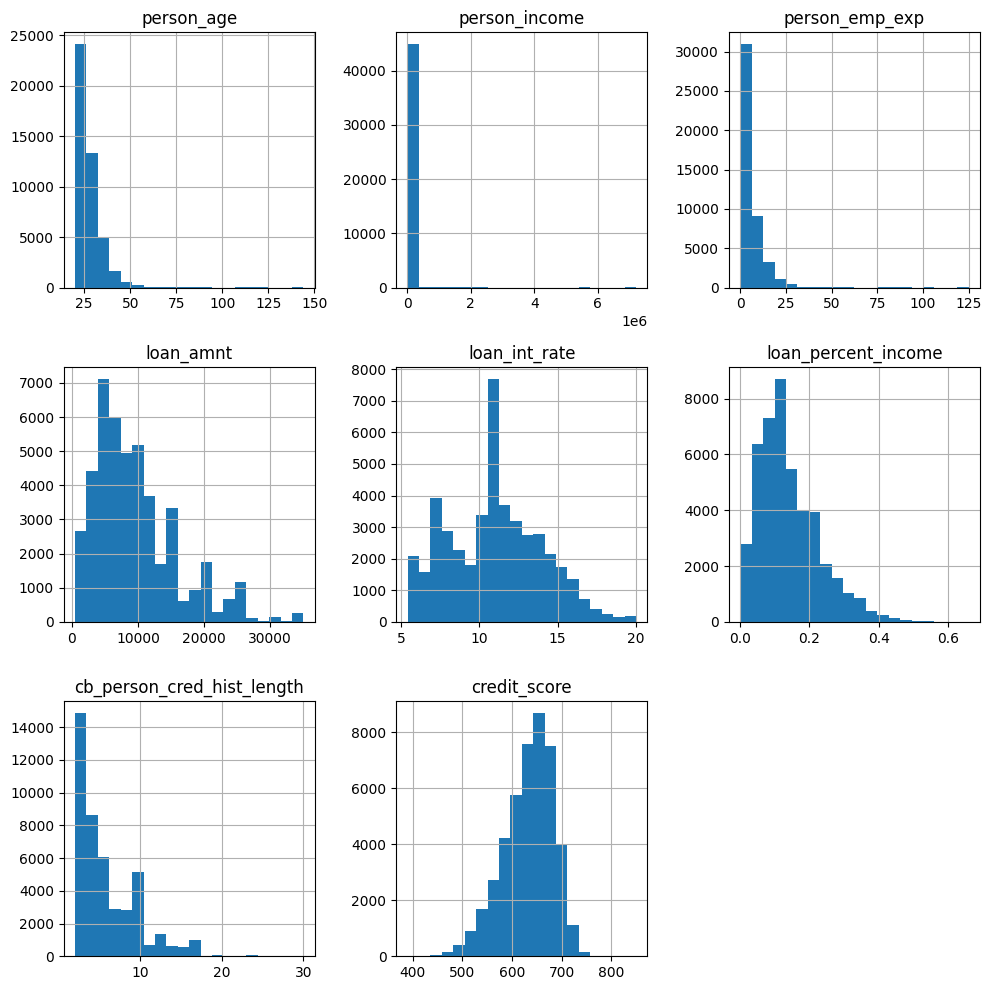

In [290]:
df[numerical_cols].hist(figsize=(10,10),bins=20)
plt.tight_layout()
plt.show()

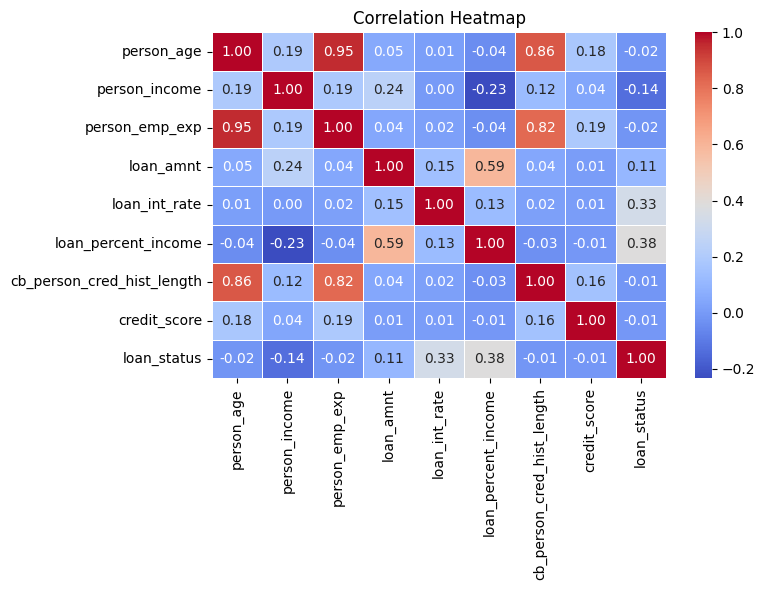

In [291]:
corr_matri = df[numerical_cols + [target_col]].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matri,annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [292]:
corr_matri[target_col].sort_values(ascending=False)

,loan_status
loan_status,1.000000
loan_percent_income,0.384880
loan_int_rate,0.332005
loan_amnt,0.107714
credit_score,-0.007647
cb_person_cred_hist_length,-0.014851
person_emp_exp,-0.020481
person_age,-0.021476
person_income,-0.135808


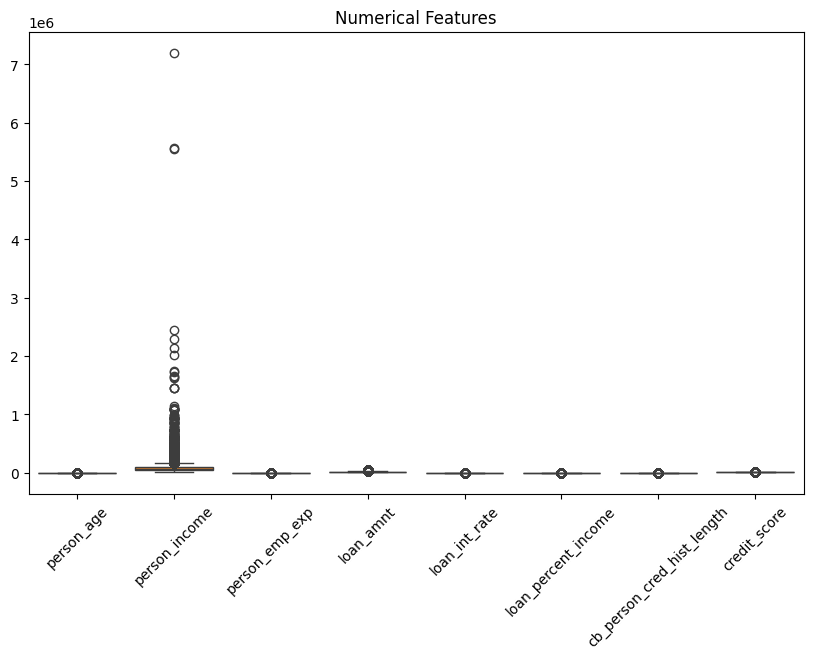

In [293]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_cols])
#df[numerical_cols].boxplot()
plt.title('Numerical Features')
plt.xticks(rotation=45)
plt.show()

loan_status,0,1
previous_loan_defaults_on_file,,
No,0.54837,0.45163
Yes,1.00000,0.00000


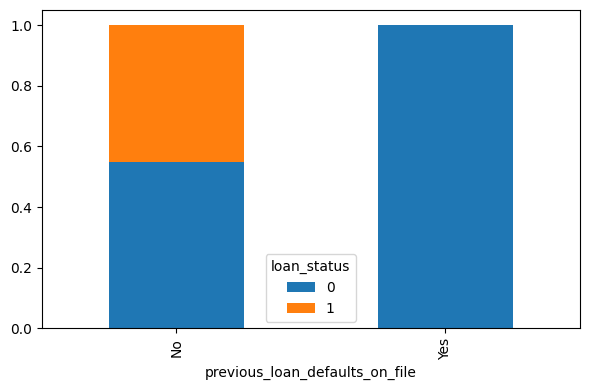

In [294]:
for c in categorical_cols:
  ct = pd.crosstab(df[c],df[target_col],normalize='index')

display(ct)
ct.plot(kind='bar',stacked=True,figsize=(6,4))
plt.tight_layout()
plt.show()

In [295]:
cols = 'person_income'
Q1=df[cols].quantile(0.25)
print(Q1)
Q3=df[cols].quantile(0.75)
print(Q3)
IQR=Q3-Q1
print(IQR)
low = Q1 - 1.5 * IQR
high = Q3 + 1.5 * IQR
print(low,high)
outliers = df[(df[cols] < low) | (df[cols] > high)]
print(len(outliers))

47204.0
95789.25
48585.25
-25673.875 168667.125
2218


In [296]:
df_copy = df.copy()
df_copy[cols +"_log"] = np.log(df_copy[cols]+1)
df_copy.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,person_income_log
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1,11.183713
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0,9.415971
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1,9.428592
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1,11.286702
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1,11.099469


## TODO B3: Feature Preparation (5 Marks)
**You must:**
- Encoding (if needed)
- Scaling
- Train-test split with stratification




In [297]:
# TODO: Prepare classification features
le = LabelEncoder()
df_copy['person_gender'] = le.fit_transform(df_copy['person_gender'])
df_copy['previous_loan_defaults_on_file'] = le.fit_transform(df_copy['previous_loan_defaults_on_file'])
df_copy.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,person_income_log
0,22.0,0,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,0,1,11.183713
1,21.0,0,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,1,0,9.415971
2,25.0,0,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,0,1,9.428592
3,23.0,0,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,0,1,11.286702
4,24.0,1,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,0,1,11.099469


In [298]:
cat_cols = ['person_education','person_home_ownership','loan_intent']
onh = OneHotEncoder()
df_on = pd.get_dummies(df_copy,columns=cat_cols,dtype=int)
df_on.head()

,person_age,person_gender,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,...,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22.0,0,71948.0,0,35000.0,16.02,0.49,3.0,561,0,...,0,0,0,1,0,0,0,0,1,0
1,21.0,0,12282.0,0,1000.0,11.14,0.08,2.0,504,1,...,0,0,1,0,0,1,0,0,0,0
2,25.0,0,12438.0,3,5500.0,12.87,0.44,3.0,635,0,...,1,0,0,0,0,0,0,1,0,0
3,23.0,0,79753.0,0,35000.0,15.23,0.44,2.0,675,0,...,0,0,0,1,0,0,0,1,0,0
4,24.0,1,66135.0,1,35000.0,14.27,0.53,4.0,586,0,...,0,0,0,1,0,0,0,1,0,0


In [299]:
df_on.drop('person_income',axis=1,inplace=True)
df_on

,person_age,person_gender,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,...,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22.0,0,0,35000.0,16.02,0.49,3.0,561,0,1,...,0,0,0,1,0,0,0,0,1,0
1,21.0,0,0,1000.0,11.14,0.08,2.0,504,1,0,...,0,0,1,0,0,1,0,0,0,0
2,25.0,0,3,5500.0,12.87,0.44,3.0,635,0,1,...,1,0,0,0,0,0,0,1,0,0
3,23.0,0,0,35000.0,15.23,0.44,2.0,675,0,1,...,0,0,0,1,0,0,0,1,0,0
4,24.0,1,1,35000.0,14.27,0.53,4.0,586,0,1,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,6,15000.0,15.66,0.31,3.0,645,0,1,...,0,0,0,1,0,0,0,1,0,0
44996,37.0,0,17,9000.0,14.07,0.14,11.0,621,0,1,...,0,0,0,1,0,0,1,0,0,0
44997,33.0,1,7,2771.0,10.02,0.05,10.0,668,0,1,...,0,0,0,1,1,0,0,0,0,0
44998,29.0,1,4,12000.0,13.23,0.36,6.0,604,0,1,...,0,0,0,1,0,1,0,0,0,0


In [300]:
df_on.columns

Index(['person_age', 'person_gender', 'person_emp_exp', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status',
       'person_income_log', 'person_education_Associate',
       'person_education_Bachelor', 'person_education_Doctorate',
       'person_education_High School', 'person_education_Master',
       'person_home_ownership_MORTGAGE', 'person_home_ownership_OTHER',
       'person_home_ownership_OWN', 'person_home_ownership_RENT',
       'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE'],
      dtype='object')

In [301]:
df_on['Age_bin'] = pd.cut(df_on['person_age'],bins=[0,30,50,70,100],
                          labels=['Young','Midedle','Middle_old','Old'])

In [302]:
df_on.head()

,person_age,person_gender,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,...,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,Age_bin
0,22.0,0,0,35000.0,16.02,0.49,3.0,561,0,1,...,0,0,1,0,0,0,0,1,0,Young
1,21.0,0,0,1000.0,11.14,0.08,2.0,504,1,0,...,0,1,0,0,1,0,0,0,0,Young
2,25.0,0,3,5500.0,12.87,0.44,3.0,635,0,1,...,0,0,0,0,0,0,1,0,0,Young
3,23.0,0,0,35000.0,15.23,0.44,2.0,675,0,1,...,0,0,1,0,0,0,1,0,0,Young
4,24.0,1,1,35000.0,14.27,0.53,4.0,586,0,1,...,0,0,1,0,0,0,1,0,0,Young


In [303]:
df_on = pd.get_dummies(df_on, columns=['Age_bin'],dtype=int)
df_on.head()

,person_age,person_gender,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,...,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,Age_bin_Young,Age_bin_Midedle,Age_bin_Middle_old,Age_bin_Old
0,22.0,0,0,35000.0,16.02,0.49,3.0,561,0,1,...,0,0,0,0,1,0,1,0,0,0
1,21.0,0,0,1000.0,11.14,0.08,2.0,504,1,0,...,0,1,0,0,0,0,1,0,0,0
2,25.0,0,3,5500.0,12.87,0.44,3.0,635,0,1,...,0,0,0,1,0,0,1,0,0,0
3,23.0,0,0,35000.0,15.23,0.44,2.0,675,0,1,...,0,0,0,1,0,0,1,0,0,0
4,24.0,1,1,35000.0,14.27,0.53,4.0,586,0,1,...,0,0,0,1,0,0,1,0,0,0


In [304]:
df_on.drop('person_age',axis=1,inplace=True)
df_on.head()

,person_gender,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,person_income_log,...,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,Age_bin_Young,Age_bin_Midedle,Age_bin_Middle_old,Age_bin_Old
0,0,0,35000.0,16.02,0.49,3.0,561,0,1,11.183713,...,0,0,0,0,1,0,1,0,0,0
1,0,0,1000.0,11.14,0.08,2.0,504,1,0,9.415971,...,0,1,0,0,0,0,1,0,0,0
2,0,3,5500.0,12.87,0.44,3.0,635,0,1,9.428592,...,0,0,0,1,0,0,1,0,0,0
3,0,0,35000.0,15.23,0.44,2.0,675,0,1,11.286702,...,0,0,0,1,0,0,1,0,0,0
4,1,1,35000.0,14.27,0.53,4.0,586,0,1,11.099469,...,0,0,0,1,0,0,1,0,0,0


In [305]:
X = df_on.drop(target_col, axis=1)
y = df_on[target_col]

In [306]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## TODO B4: Logistic Regression with L2 (8 Marks)
**You must:**
- Train Logistic Regression
- Evaluate using Accuracy, Precision, Recall
- Show Confusion Matrix

**Marks:** Model (4), Metrics (4)


In [307]:
# TODO: Logistic Regression
clf = LogisticRegression(max_iter=100)
clf.fit(X_train_scaled, y_train)

y_test_pred = clf.predict(X_test_scaled)
y_test_proba = clf.predict_proba(X_test_scaled)[:, 1]
print("Test Accuracy: ", accuracy_score(y_test, y_test_pred))

Test Accuracy:  0.9017777777777778


In [308]:
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion matrix:\n",cm)

Confusion matrix:
 [[6587  413]
 [ 471 1529]]


In [309]:
print("\nClassification repot:\n", classification_report(y_test, y_test_pred))


Classification repot:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94      7000
           1       0.79      0.76      0.78      2000

    accuracy                           0.90      9000
   macro avg       0.86      0.85      0.86      9000
weighted avg       0.90      0.90      0.90      9000



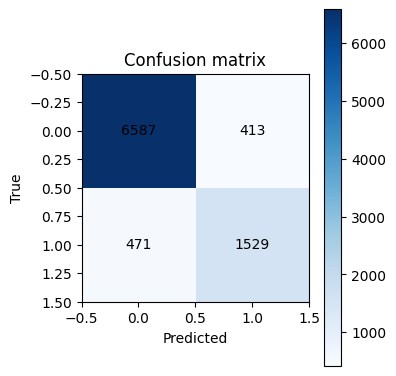

In [310]:
plt.figure(figsize=(4, 4))
plt.imshow(cm, cmap="Blues")
plt.title("Confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.colorbar()
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center", color="black")

plt.tight_layout()
plt.show()

In [311]:
acc = accuracy_score(y_test, y_test_pred)
print("Accuracy:", acc)
prec = precision_score(y_test, y_test_pred)
print("Precision:", prec)
rec = recall_score(y_test, y_test_pred)
print("Recall:", rec)
f1 = f1_score(y_test, y_test_pred)
print("F1 score:", f1)

Accuracy: 0.9017777777777778
Precision: 0.7873326467559217
Recall: 0.7645
F1 score: 0.7757483510908169


## TODO B5: Support Vector Machine (7 Marks)
**You must:**
- Train SVM (Linear or RBF)
- Evaluate

**Marks:** Model (4), Evaluation (3)


In [312]:
# TODO: SVM Classification
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

svc_bc = SVC(kernel='rbf', C=1.0, gamma = 'scale', random_state=42)
svc_bc.fit(X_train_scaled, y_train)

y_bc_pred = svc_bc.predict(X_test_scaled)
acc_bc = accuracy_score(y_test, y_bc_pred)
print("Accuracy with RBF: ", acc_bc)

print('\nClassification report:')
print(classification_report(y_test, y_bc_pred, target_names=[str(x) for x in y_test.unique()]))

Accuracy with RBF:  0.9165555555555556

Classification report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      7000
           1       0.85      0.76      0.80      2000

    accuracy                           0.92      9000
   macro avg       0.89      0.86      0.87      9000
weighted avg       0.91      0.92      0.91      9000



In [313]:
# Confusion matrix
cm = confusion_matrix(y_test, y_bc_pred)
print('Confusion matrix:\n', cm)

Confusion matrix:
 [[6729  271]
 [ 480 1520]]


## TODO B6: Naive Bayes (5 Marks)
**You must:**
- Choose correct NB variant



In [314]:
# TODO: Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [315]:
y_pred = gnb.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy on test set: ", acc)

Accuracy on test set:  0.8581111111111112


## TODO B7: K-Nearest Neighbors (5 Marks)
**You must:**
- Try multiple K values
- Plot accuracy vs K

**Marks:** Experiment (3), Plot & choice (2)


In [316]:
# TODO: KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=15, metric="minkowski", p=2)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

In [317]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", float(accuracy_score(y_test, y_pred)))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=[str(x) for x in y_test.unique()]))

Accuracy: 0.8981111111111111

Confusion Matrix:
 [[6763  237]
 [ 680 1320]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      7000
           1       0.85      0.66      0.74      2000

    accuracy                           0.90      9000
   macro avg       0.88      0.81      0.84      9000
weighted avg       0.90      0.90      0.89      9000



In [318]:
k_values = range(1,42)
accs = []

for k in k_values:
  model = Pipeline([
      ("scaler", StandardScaler()),
      ("knn", KNeighborsClassifier(n_neighbors=k))
  ])
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  accs.append(accuracy_score(y_test, pred))

In [319]:
print(accs)

[0.8798888888888889, 0.8791111111111111, 0.891, 0.8892222222222222, 0.8971111111111111, 0.894, 0.8987777777777778, 0.8963333333333333, 0.8992222222222223, 0.8967777777777778, 0.8978888888888888, 0.8956666666666667, 0.9003333333333333, 0.8966666666666666, 0.8981111111111111, 0.8954444444444445, 0.8987777777777778, 0.8954444444444445, 0.8963333333333333, 0.895, 0.8964444444444445, 0.8937777777777778, 0.8971111111111111, 0.8944444444444445, 0.8968888888888888, 0.8938888888888888, 0.8958888888888888, 0.8938888888888888, 0.8951111111111111, 0.8933333333333333, 0.8933333333333333, 0.8921111111111111, 0.8923333333333333, 0.8901111111111111, 0.8923333333333333, 0.8892222222222222, 0.8917777777777778, 0.8901111111111111, 0.8913333333333333, 0.8888888888888888, 0.8897777777777778]


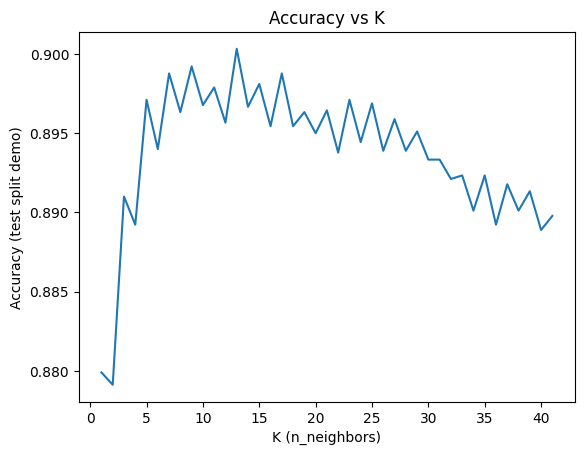

Best K (by this demo): 13
Best accuracy: 0.9003333333333333


In [320]:
plt.figure()
plt.plot(list(k_values), accs)
plt.xlabel("K (n_neighbors)")
plt.ylabel("Accuracy (test split demo)")
plt.title("Accuracy vs K")
plt.show()

best_k = list(k_values)[int(np.argmax(accs))]
print("Best K (by this demo):", best_k)
print("Best accuracy:", float(np.max(accs)))

In [321]:
k_demo = best_k
settings = [
    ("Euclidean (p=2), uniform", KNeighborsClassifier(n_neighbors=k_demo, metric="minkowski",p=2,weights="uniform")),
    ("Manhattan (p=1), uniform", KNeighborsClassifier(n_neighbors=k_demo, metric="minkowski",p=1,weights="uniform")),
    ("Euclidean (p=2), distance", KNeighborsClassifier(n_neighbors=k_demo, metric="minkowski",p=2,weights="distance")),
]

rows = []
for name,knn in settings:
  model = Pipeline([("scaler", StandardScaler()), ("knn",knn)])
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  rows.append([name, accuracy_score(y_test,pred)])

pd.DataFrame(rows, columns=["Setting", "Accuracy"]).sort_values("Accuracy", ascending=False)

,Setting,Accuracy
2,"Euclidean (p=2), distance",0.902333
1,"Manhattan (p=1), uniform",0.900556
0,"Euclidean (p=2), uniform",0.900333


## TODO B8: Random Forest Classifier (5 Marks)
**You must:**
- Train model
- Show feature importance

**Marks:** Model (3), Interpretation (2)


In [322]:
# TODO: Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_scaled, y_train)
y_pred_rf = rf_classifier.predict(X_test_scaled)

In [323]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf, target_names=[str(x) for x in y_test.unique()])


In [324]:
print(f"Accuracy: {accuracy_rf:.4f}")
print("\nConfusion Matrix:\n", conf_matrix_rf)
print("\nClassification Report:\n", class_report_rf)

Accuracy: 0.9287

Confusion Matrix:
 [[6834  166]
 [ 476 1524]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.96      7000
           1       0.90      0.76      0.83      2000

    accuracy                           0.93      9000
   macro avg       0.92      0.87      0.89      9000
weighted avg       0.93      0.93      0.93      9000



In [325]:
importances = pd.Series(
    rf_classifier.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

importances.head(10)

,0
previous_loan_defaults_on_file,0.225751
loan_percent_income,0.157982
loan_int_rate,0.155188
person_income_log,0.125388
loan_amnt,0.066570
credit_score,0.057246
person_home_ownership_RENT,0.034281
person_emp_exp,0.030401
cb_person_cred_hist_length,0.028476
person_home_ownership_MORTGAGE,0.022996


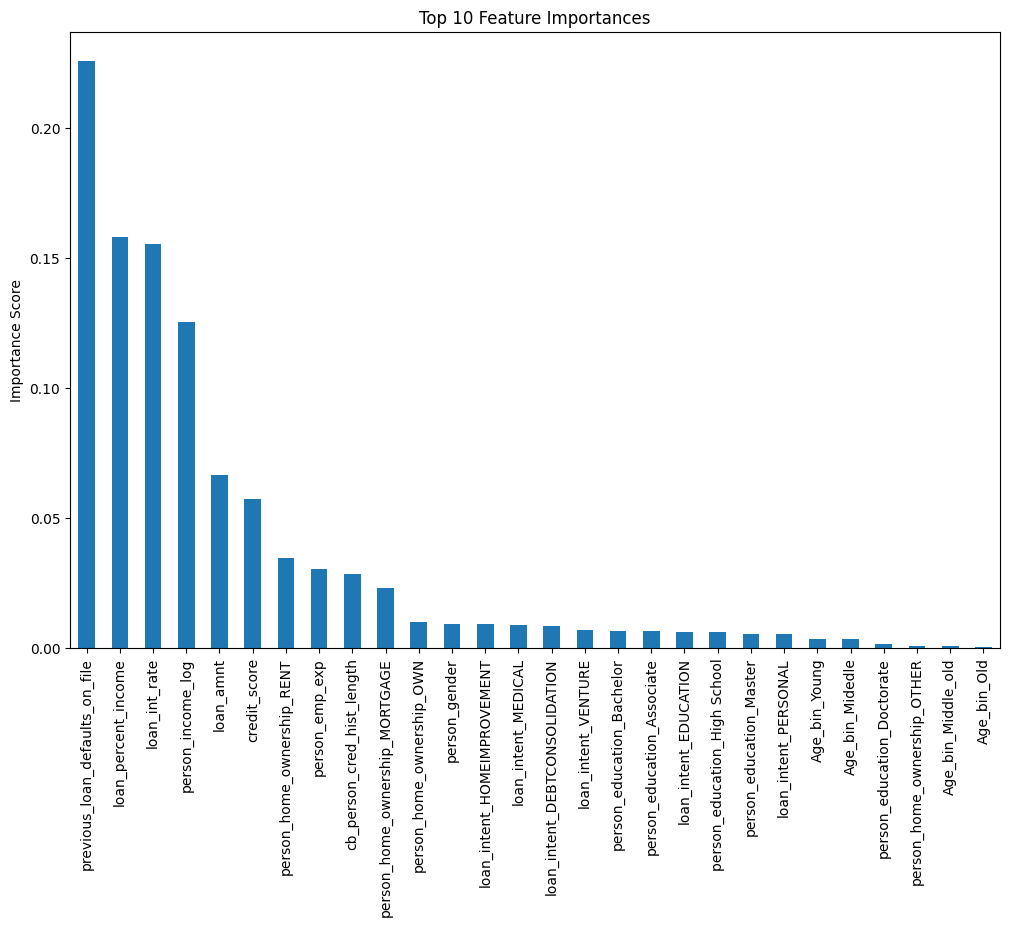

In [326]:
plt.figure(figsize=(12,8))
importances.plot(kind="bar")
plt.title("Top 10 Feature Importances")
plt.ylabel("Importance Score")
plt.show()

# 🧠 Final Reflection (5 Marks)
**Answer briefly:**
- Best regression model and why
- Best classification model and why
- One real-world deployment scenario


## TODO: Write your reflection here
# Ans :Best regression model is SVR with RBF kernel. Because non linear relationships between features and target.Strong performance metrics.

## Ans : Best classification is Random Forest.Because highest accuracy (92.9%) and weighted F1 (0.93).non linear feature interactions
